In [146]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [147]:
data = pd.read_csv('Churn.csv')

In [148]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [149]:
data = data.drop(["CustomerId", "RowNumber", "Surname"], axis = 1)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [151]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

UNIVARIATE ANALYSIS

In [152]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

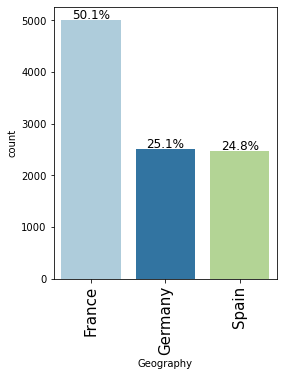

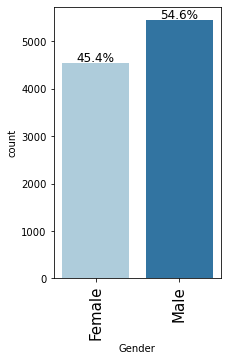

In [153]:
for x in data.select_dtypes("object"):
    labeled_barplot(data, x, perc=True)

It seems that this bank is mostly popular among the French. Men also use this bank slightly more than women, but this number is inconsequential, as it is fairly even.

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

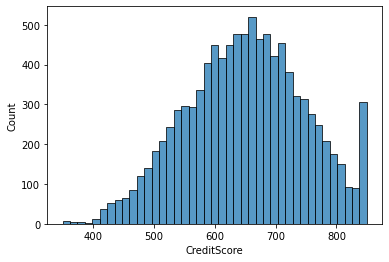

In [154]:
sns.histplot(data["CreditScore"])

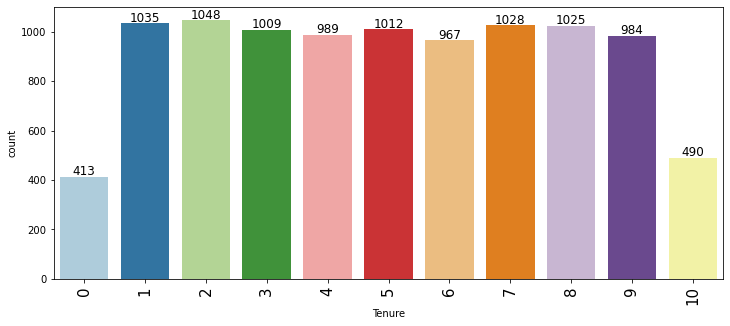

In [155]:
labeled_barplot(data, "Tenure")

<AxesSubplot:xlabel='Age', ylabel='Count'>

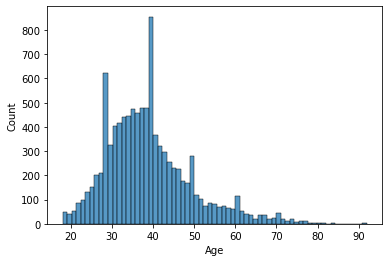

In [156]:
sns.histplot(data["Age"])

<AxesSubplot:xlabel='Balance', ylabel='Count'>

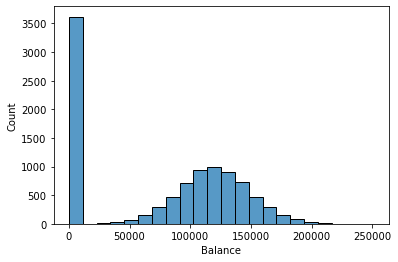

In [157]:
sns.histplot(data["Balance"])

There is an odd number of balances that are 0, but this is expected and should be kept because some people simply do not have any money in their bank account, which could have an effect on them leaving.

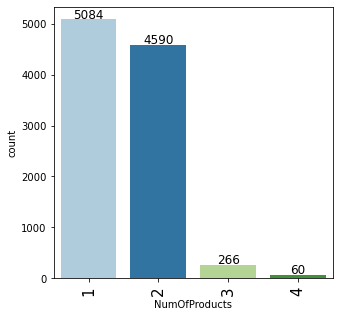

In [158]:
labeled_barplot(data, "NumOfProducts")

Most people have only bought one or two products with this bank.

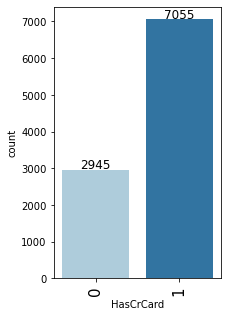

In [159]:
labeled_barplot(data,"HasCrCard")

Most people have a credit card.

BIVARIATE ANALYSIS

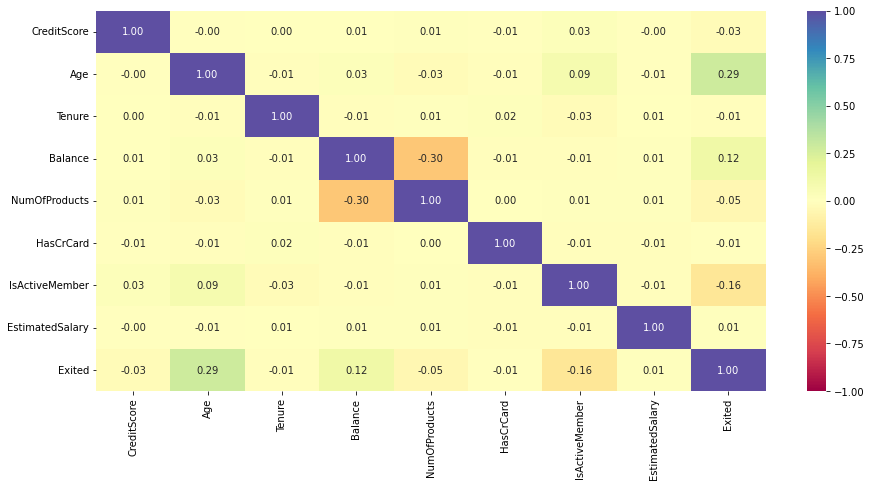

In [160]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Literally none of these have any correlation with each other. The only two relationships that have any meaning are between age and exited, and Number of Products and Balance. <br>

Age and Exited: This may be because as Age increases, people find new banks to go through. <br>
Balance and NumOfProducts: This makes sense becausethe more money you have, the fewer products you will have purchased. <br>

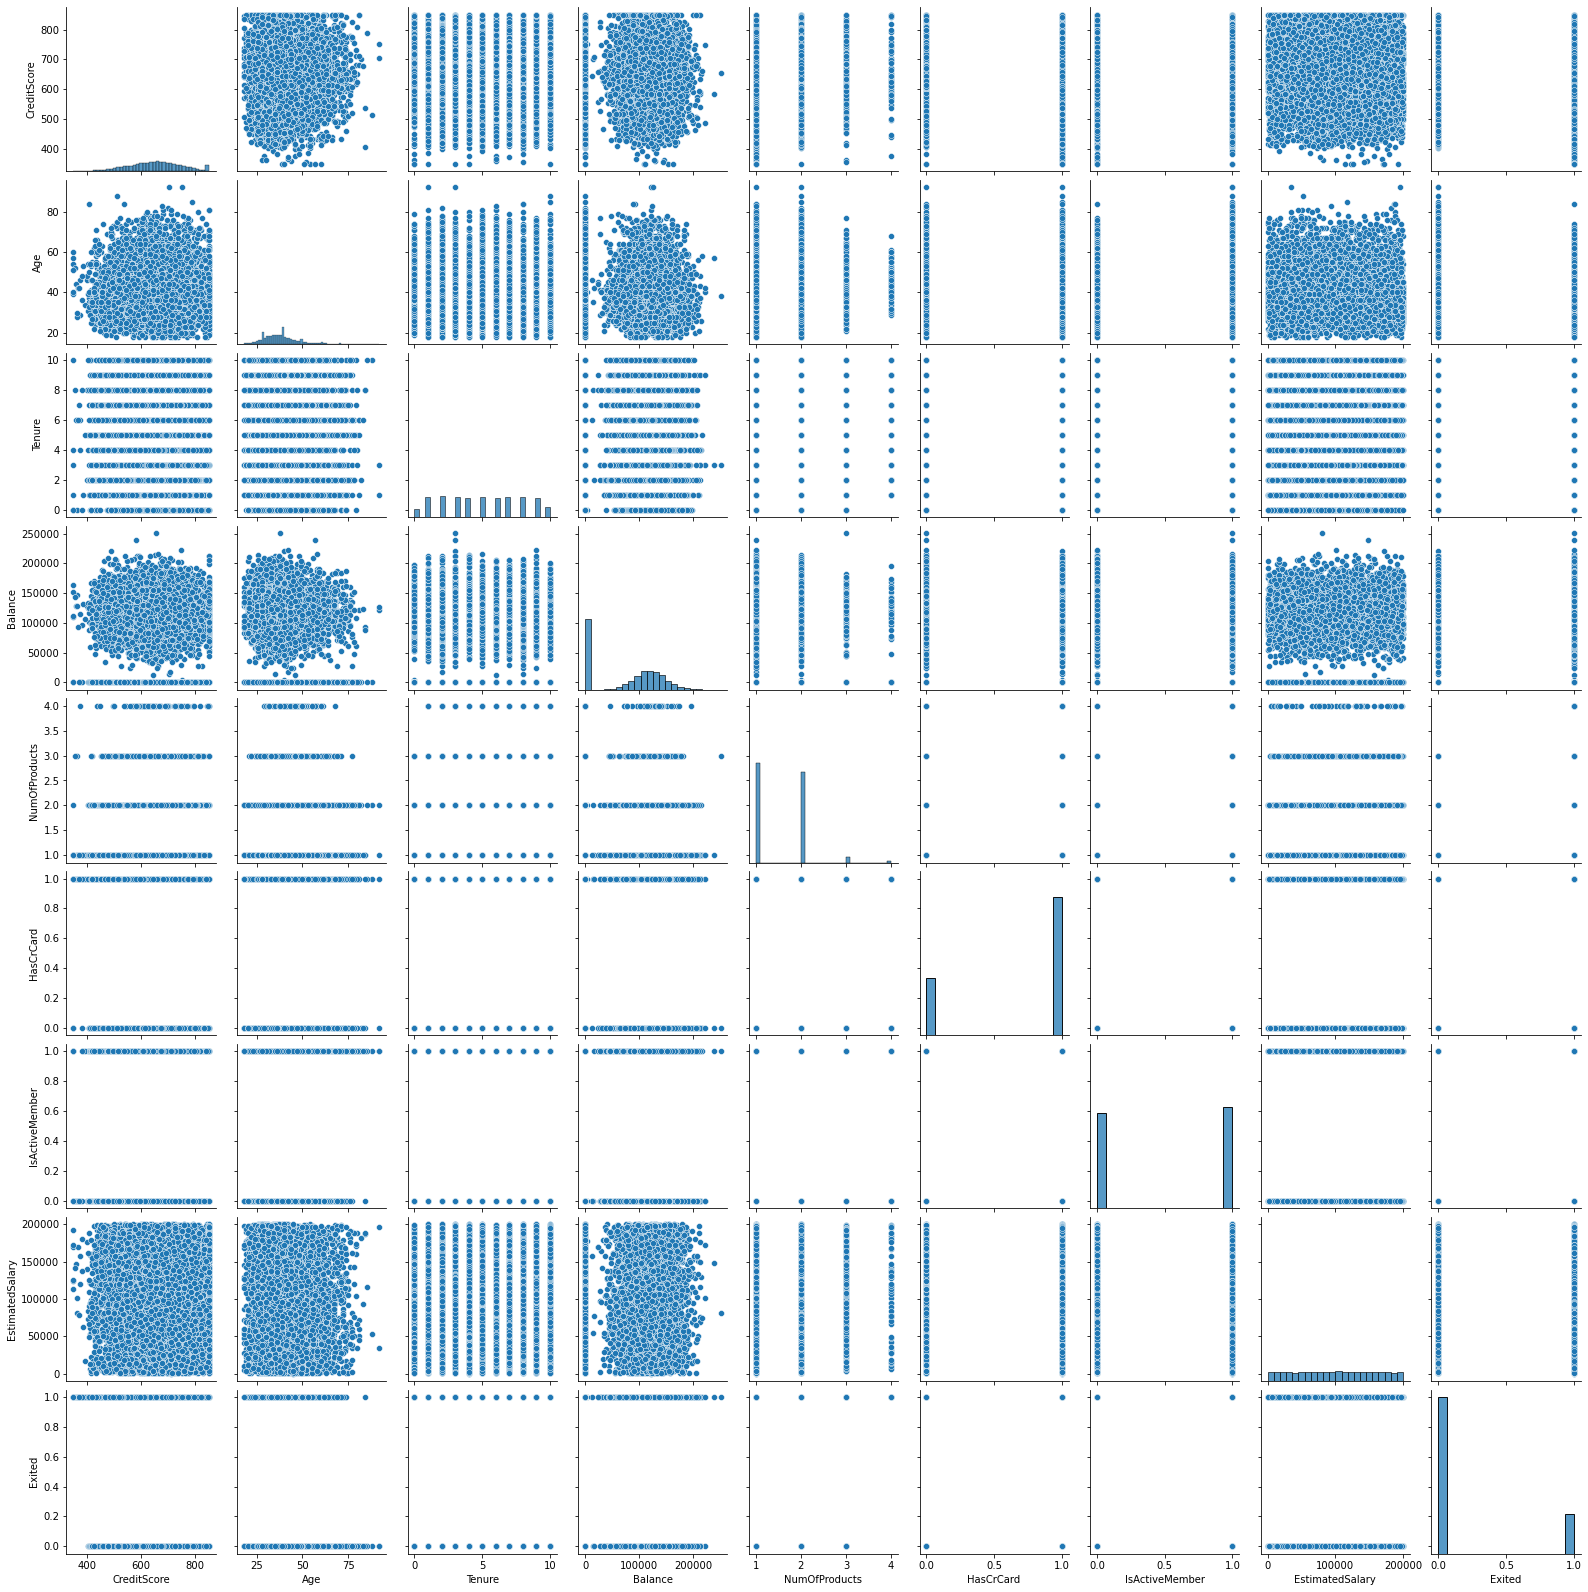

In [161]:
sns.pairplot(data)

My untrained eyes cannot see any relation here, even where the heatmap says there should be. These variables are very unrelated, and I would be surprised if we could get a decent neural network from this.

In [162]:
X = data.drop(['Exited'],axis=1)
Y = data[['Exited']]

In [163]:
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 5,shuffle = True)

In [164]:
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.3, random_state = 5,shuffle = True)

In [165]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6222,582,France,Male,31,2,0.00,2,1,1,33747.03
4085,520,France,Male,34,4,134007.90,1,1,1,193209.11
6328,790,Spain,Female,41,7,109508.68,1,0,0,86776.38
2594,537,Germany,Female,47,6,103163.35,1,1,0,16259.64
9987,606,Spain,Male,30,8,180307.73,2,1,1,1914.41


In [166]:
sc=StandardScaler()
x = ["CreditScore","Age","Tenure","Balance", "EstimatedSalary", "NumOfProducts"]
temp = sc.fit(X_train[x])

In [167]:
X_train[x] = temp.transform(X_train[x])
X_test[x] = temp.transform(X_test[x])
X_val[x] = temp.transform(X_val[x])

In [168]:
y_train = sc.fit_transform(y_train)  
y_val_scale = sc.transform(y_val)

In [169]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6222,-0.705093,France,Male,-0.754232,-1.038141,-1.230161,0.823097,1,1,-1.158081
4085,-1.346339,France,Male,-0.467152,-0.346669,0.924816,-0.902531,1,1,1.620116
6328,1.446183,Spain,Female,0.202703,0.690539,0.530844,-0.902531,0,0,-0.234188
2594,-1.170513,Germany,Female,0.776865,0.344803,0.428805,-0.902531,1,0,-1.462752
9987,-0.456869,Spain,Male,-0.849926,1.036275,1.669362,0.823097,1,1,-1.712679
...,...,...,...,...,...,...,...,...,...,...
8440,0.132664,Spain,Female,-0.562845,1.036275,0.325979,-0.902531,1,1,-1.103775
1720,1.601323,Germany,Female,-0.562845,-0.692405,0.469011,0.823097,0,1,-1.165331
6305,0.784252,Germany,Female,-0.562845,0.690539,0.362599,0.823097,1,1,-0.769459
6690,-0.798177,Germany,Male,-0.849926,1.036275,0.818659,-0.902531,1,0,1.615612


In [170]:
X_train = pd.get_dummies(X_train,columns=["Gender", "Geography"],drop_first= True)
X_test = pd.get_dummies(X_test,columns=["Gender", "Geography"],drop_first= True)
X_val = pd.get_dummies(X_val,columns=["Gender", "Geography"],drop_first= True)


In [171]:
X_val

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
340,-0.084532,0.107010,0.344803,0.852364,0.823097,0,1,-0.245985,0,1,0
8622,0.577399,-0.275765,1.382011,-0.288280,0.823097,1,0,-1.035655,1,1,0
8401,-1.191199,1.829494,-1.383877,-1.230161,0.823097,1,1,-1.540798,1,0,1
4338,0.660140,-1.328394,-1.038141,-1.230161,-0.902531,1,1,0.570776,1,0,1
8915,-0.456869,-0.275765,-1.383877,1.272929,-0.902531,1,1,1.605802,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.301729,0.776865,0.690539,0.496344,-0.902531,1,1,-0.582235,1,1,0
6179,-0.612009,-0.467152,-0.346669,1.192200,-0.902531,1,1,-0.486838,0,1,0
4110,-0.953317,0.107010,0.344803,-1.230161,0.823097,1,0,1.282746,1,0,0
7923,0.825623,-0.084377,-0.000933,0.681325,-0.902531,1,1,1.099335,1,0,1


In [172]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6300, 11)
(2700, 11)
(6300, 1)
(2700, 1)
(1000, 11)
(1000, 1)


In [173]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 0.8458 - mae: 0.6903 - accuracy: 0.0000e+00 - val_loss: 0.7555 - val_mae: 0.6733 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 748us/step - loss: 0.7170 - mae: 0.6097 - accuracy: 0.0000e+00 - val_loss: 0.7003 - val_mae: 0.5943 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 743us/step - loss: 0.6773 - mae: 0.5775 - accuracy: 0.0000e+00 - val_loss: 0.6800 - val_mae: 0.5471 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 717us/step - loss: 0.6565 - mae: 0.5581 - accuracy: 0.0000e+00 - val_loss: 0.6977 - val_mae: 0.5267 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 743us/step - loss: 0.6412 - mae: 0.5455 - accuracy: 0.0000e+00 - val_loss: 0.6705 - val_mae: 0.5396 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 727us/step - loss: 0.6281

197/197 [==============================] - 0s 723us/step - loss: 0.4674 - mae: 0.4423 - accuracy: 0.0000e+00 - val_loss: 0.7070 - val_mae: 0.5683 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 723us/step - loss: 0.4666 - mae: 0.4425 - accuracy: 0.0000e+00 - val_loss: 0.7218 - val_mae: 0.5588 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 728us/step - loss: 0.4631 - mae: 0.4411 - accuracy: 0.0000e+00 - val_loss: 0.7364 - val_mae: 0.5366 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 728us/step - loss: 0.4637 - mae: 0.4387 - accuracy: 0.0000e+00 - val_loss: 0.7111 - val_mae: 0.5441 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 742us/step - loss: 0.4599 - mae: 0.4390 - accuracy: 0.0000e+00 - val_loss: 0.7198 - val_mae: 0.5525 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 732us/step - loss: 0.4573 - m

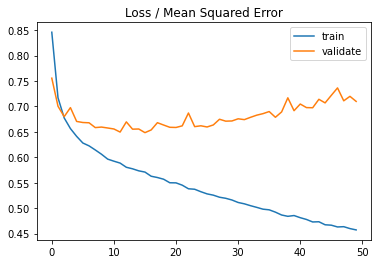

In [174]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
# Initializing the Optimizer
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

This model is clearly overfitting! Let's try increasing the learing rate to try and lower the overfit.

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 0.8994 - mae: 0.6719 - accuracy: 0.0000e+00 - val_loss: 0.7156 - val_mae: 0.6209 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 753us/step - loss: 0.6986 - mae: 0.5737 - accuracy: 0.0000e+00 - val_loss: 0.6692 - val_mae: 0.5473 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 743us/step - loss: 0.6756 - mae: 0.5551 - accuracy: 0.0000e+00 - val_loss: 0.6706 - val_mae: 0.5144 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 728us/step - loss: 0.6633 - mae: 0.5483 - accuracy: 0.0000e+00 - val_loss: 0.6867 - val_mae: 0.4949 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 751us/step - loss: 0.6526 - mae: 0.5403 - accuracy: 0.0000e+00 - val_loss: 0.6748 - val_mae: 0.5375 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 728us/step - loss: 0.6421

197/197 [==============================] - 0s 762us/step - loss: 0.4505 - mae: 0.4144 - accuracy: 0.0000e+00 - val_loss: 0.7897 - val_mae: 0.5810 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 762us/step - loss: 0.4521 - mae: 0.4109 - accuracy: 0.0000e+00 - val_loss: 0.7390 - val_mae: 0.5302 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 736us/step - loss: 0.4541 - mae: 0.4122 - accuracy: 0.0000e+00 - val_loss: 0.7454 - val_mae: 0.5038 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 766us/step - loss: 0.4510 - mae: 0.4114 - accuracy: 0.0000e+00 - val_loss: 0.7394 - val_mae: 0.5227 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 779us/step - loss: 0.4446 - mae: 0.4067 - accuracy: 0.0000e+00 - val_loss: 0.7470 - val_mae: 0.5059 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 738us/step - loss: 0.4412 - m

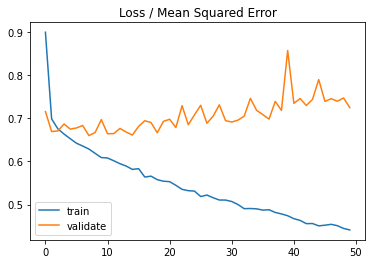

In [175]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
optimizer = RMSprop( learning_rate=0.006)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 0.8762 - mae: 0.6906 - accuracy: 0.0000e+00 - val_loss: 0.7480 - val_mae: 0.6290 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 776us/step - loss: 0.7070 - mae: 0.5761 - accuracy: 0.0000e+00 - val_loss: 0.6734 - val_mae: 0.5665 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 778us/step - loss: 0.6877 - mae: 0.5627 - accuracy: 0.0000e+00 - val_loss: 0.6811 - val_mae: 0.5170 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 743us/step - loss: 0.6713 - mae: 0.5496 - accuracy: 0.0000e+00 - val_loss: 0.6850 - val_mae: 0.5122 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 784us/step - loss: 0.6593 - mae: 0.5422 - accuracy: 0.0000e+00 - val_loss: 0.6777 - val_mae: 0.5332 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 758us/step - loss: 0.6516

197/197 [==============================] - 0s 779us/step - loss: 0.5040 - mae: 0.4291 - accuracy: 0.0000e+00 - val_loss: 0.7070 - val_mae: 0.4988 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 773us/step - loss: 0.5022 - mae: 0.4308 - accuracy: 0.0000e+00 - val_loss: 0.7056 - val_mae: 0.5362 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 768us/step - loss: 0.4929 - mae: 0.4293 - accuracy: 0.0000e+00 - val_loss: 0.7296 - val_mae: 0.4814 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 768us/step - loss: 0.4868 - mae: 0.4199 - accuracy: 0.0000e+00 - val_loss: 0.7048 - val_mae: 0.4984 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 753us/step - loss: 0.4862 - mae: 0.4253 - accuracy: 0.0000e+00 - val_loss: 0.7422 - val_mae: 0.5075 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 776us/step - loss: 0.4902 - m

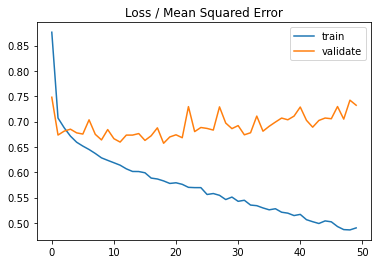

In [176]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
optimizer = RMSprop( learning_rate=0.006)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 0.8245 - mae: 0.6500 - accuracy: 0.0000e+00 - val_loss: 0.7547 - val_mae: 0.6390 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 748us/step - loss: 0.7007 - mae: 0.5680 - accuracy: 0.0000e+00 - val_loss: 0.6708 - val_mae: 0.5880 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 758us/step - loss: 0.6818 - mae: 0.5557 - accuracy: 0.0000e+00 - val_loss: 0.6757 - val_mae: 0.5090 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 768us/step - loss: 0.6685 - mae: 0.5480 - accuracy: 0.0000e+00 - val_loss: 0.6795 - val_mae: 0.4926 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 758us/step - loss: 0.6585 - mae: 0.5419 - accuracy: 0.0000e+00 - val_loss: 0.6757 - val_mae: 0.5391 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 730us/step - loss: 0.6470

197/197 [==============================] - 0s 758us/step - loss: 0.5497 - mae: 0.4617 - accuracy: 0.0000e+00 - val_loss: 0.7237 - val_mae: 0.5508 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 728us/step - loss: 0.5437 - mae: 0.4578 - accuracy: 0.0000e+00 - val_loss: 0.7336 - val_mae: 0.5527 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 768us/step - loss: 0.5460 - mae: 0.4603 - accuracy: 0.0000e+00 - val_loss: 0.7123 - val_mae: 0.5048 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 743us/step - loss: 0.5447 - mae: 0.4589 - accuracy: 0.0000e+00 - val_loss: 0.7300 - val_mae: 0.5139 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 777us/step - loss: 0.5436 - mae: 0.4565 - accuracy: 0.0000e+00 - val_loss: 0.7132 - val_mae: 0.5051 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 773us/step - loss: 0.5511 - m

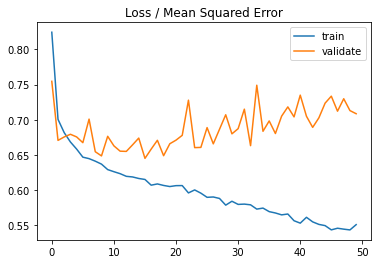

In [177]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
optimizer = RMSprop( learning_rate=0.01)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 0.8598 - mae: 0.7041 - accuracy: 0.0000e+00 - val_loss: 0.7329 - val_mae: 0.6383 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 736us/step - loss: 0.7141 - mae: 0.5994 - accuracy: 0.0000e+00 - val_loss: 0.6862 - val_mae: 0.5571 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 748us/step - loss: 0.6895 - mae: 0.5736 - accuracy: 0.0000e+00 - val_loss: 0.6873 - val_mae: 0.5009 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 723us/step - loss: 0.6752 - mae: 0.5596 - accuracy: 0.0000e+00 - val_loss: 0.7111 - val_mae: 0.5106 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 743us/step - loss: 0.6677 - mae: 0.5567 - accuracy: 0.0000e+00 - val_loss: 0.6683 - val_mae: 0.5368 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 763us/step - loss: 0.6508

197/197 [==============================] - 0s 728us/step - loss: 0.5347 - mae: 0.4502 - accuracy: 0.0000e+00 - val_loss: 0.7116 - val_mae: 0.5478 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 733us/step - loss: 0.5422 - mae: 0.4529 - accuracy: 0.0000e+00 - val_loss: 0.7353 - val_mae: 0.5923 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 728us/step - loss: 0.5308 - mae: 0.4508 - accuracy: 0.0000e+00 - val_loss: 0.7070 - val_mae: 0.4605 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 725us/step - loss: 0.5319 - mae: 0.4429 - accuracy: 0.0000e+00 - val_loss: 0.7120 - val_mae: 0.5006 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 728us/step - loss: 0.5283 - mae: 0.4444 - accuracy: 0.0000e+00 - val_loss: 0.6955 - val_mae: 0.4894 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 737us/step - loss: 0.5263 - m

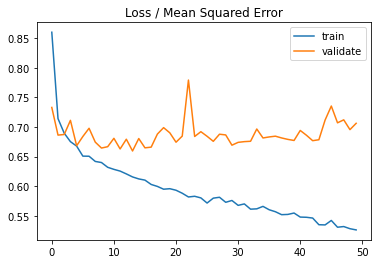

In [178]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
optimizer = RMSprop( learning_rate=0.006)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 1.0297 - mae: 0.7876 - accuracy: 0.0000e+00 - val_loss: 0.9050 - val_mae: 0.7579 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 728us/step - loss: 0.8591 - mae: 0.7071 - accuracy: 0.0000e+00 - val_loss: 0.7986 - val_mae: 0.6778 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 748us/step - loss: 0.7728 - mae: 0.6437 - accuracy: 0.0000e+00 - val_loss: 0.7413 - val_mae: 0.6027 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 723us/step - loss: 0.7260 - mae: 0.6062 - accuracy: 0.0000e+00 - val_loss: 0.7118 - val_mae: 0.5733 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 728us/step - loss: 0.7008 - mae: 0.5864 - accuracy: 0.0000e+00 - val_loss: 0.7057 - val_mae: 0.5630 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 740us/step - loss: 0.6849

197/197 [==============================] - 0s 717us/step - loss: 0.5695 - mae: 0.4798 - accuracy: 0.0000e+00 - val_loss: 0.6571 - val_mae: 0.5181 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 733us/step - loss: 0.5675 - mae: 0.4774 - accuracy: 0.0000e+00 - val_loss: 0.6667 - val_mae: 0.5332 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 733us/step - loss: 0.5674 - mae: 0.4795 - accuracy: 0.0000e+00 - val_loss: 0.6523 - val_mae: 0.4990 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 712us/step - loss: 0.5673 - mae: 0.4768 - accuracy: 0.0000e+00 - val_loss: 0.6595 - val_mae: 0.4994 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 759us/step - loss: 0.5658 - mae: 0.4763 - accuracy: 0.0000e+00 - val_loss: 0.6577 - val_mae: 0.5045 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 728us/step - loss: 0.5647 - m

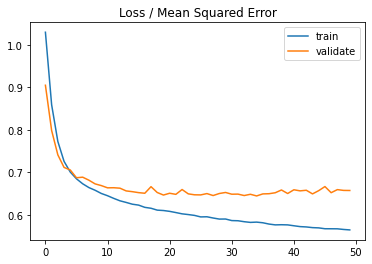

In [179]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 0.9949 - mae: 0.7630 - accuracy: 0.0000e+00 - val_loss: 0.8544 - val_mae: 0.7355 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 768us/step - loss: 0.8300 - mae: 0.7014 - accuracy: 0.0000e+00 - val_loss: 0.7719 - val_mae: 0.6742 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 794us/step - loss: 0.7624 - mae: 0.6550 - accuracy: 0.0000e+00 - val_loss: 0.7280 - val_mae: 0.6083 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 748us/step - loss: 0.7199 - mae: 0.6175 - accuracy: 0.0000e+00 - val_loss: 0.7063 - val_mae: 0.5878 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 731us/step - loss: 0.6943 - mae: 0.5942 - accuracy: 0.0000e+00 - val_loss: 0.6873 - val_mae: 0.5636 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 733us/step - loss: 0.6772

197/197 [==============================] - 0s 753us/step - loss: 0.5879 - mae: 0.5072 - accuracy: 0.0000e+00 - val_loss: 0.6633 - val_mae: 0.5285 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 756us/step - loss: 0.5877 - mae: 0.5062 - accuracy: 0.0000e+00 - val_loss: 0.6620 - val_mae: 0.5447 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 789us/step - loss: 0.5876 - mae: 0.5074 - accuracy: 0.0000e+00 - val_loss: 0.6645 - val_mae: 0.5294 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 756us/step - loss: 0.5861 - mae: 0.5043 - accuracy: 0.0000e+00 - val_loss: 0.6695 - val_mae: 0.5309 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 723us/step - loss: 0.5846 - mae: 0.5054 - accuracy: 0.0000e+00 - val_loss: 0.6648 - val_mae: 0.5406 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 748us/step - loss: 0.5841 - m

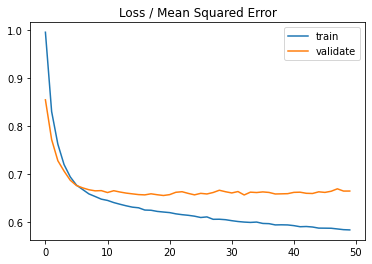

In [180]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(4, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
# Initializing the Optimizer
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 1.0344 - mae: 0.7612 - accuracy: 0.0000e+00 - val_loss: 0.9961 - val_mae: 0.7847 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 751us/step - loss: 0.9823 - mae: 0.7822 - accuracy: 0.0000e+00 - val_loss: 0.9813 - val_mae: 0.7825 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 728us/step - loss: 0.9696 - mae: 0.7732 - accuracy: 0.0000e+00 - val_loss: 0.9676 - val_mae: 0.7644 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 751us/step - loss: 0.9559 - mae: 0.7602 - accuracy: 0.0000e+00 - val_loss: 0.9526 - val_mae: 0.7463 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 773us/step - loss: 0.9397 - mae: 0.7440 - accuracy: 0.0000e+00 - val_loss: 0.9332 - val_mae: 0.7261 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 753us/step - loss: 0.9209

197/197 [==============================] - 0s 738us/step - loss: 0.6303 - mae: 0.5272 - accuracy: 0.0000e+00 - val_loss: 0.6456 - val_mae: 0.5445 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 721us/step - loss: 0.6301 - mae: 0.5244 - accuracy: 0.0000e+00 - val_loss: 0.6455 - val_mae: 0.5487 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 723us/step - loss: 0.6291 - mae: 0.5281 - accuracy: 0.0000e+00 - val_loss: 0.6500 - val_mae: 0.5043 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 723us/step - loss: 0.6281 - mae: 0.5220 - accuracy: 0.0000e+00 - val_loss: 0.6452 - val_mae: 0.5272 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 738us/step - loss: 0.6275 - mae: 0.5249 - accuracy: 0.0000e+00 - val_loss: 0.6498 - val_mae: 0.5102 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 799us/step - loss: 0.6269 - m

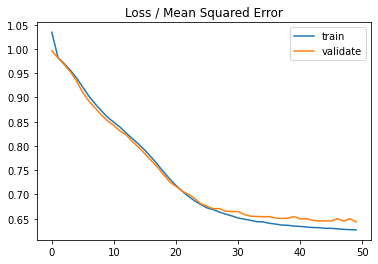

In [181]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(8, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(4, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
# Initializing the Optimizer
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

That worked perfectly! The train and validate sets are nearly perfectly aligned! Although the Data still works better on the train data than the validate data, this is to be expected. Out of curiosity, will it work better with higher epochs?

Epoch 1/100
197/197 [==============================] - 1s 1ms/step - loss: 1.0445 - mae: 0.7788 - accuracy: 0.0000e+00 - val_loss: 0.9430 - val_mae: 0.7506 - val_accuracy: 0.0000e+00
Epoch 2/100
197/197 [==============================] - 0s 733us/step - loss: 0.9057 - mae: 0.7128 - accuracy: 0.0000e+00 - val_loss: 0.8841 - val_mae: 0.6948 - val_accuracy: 0.0000e+00
Epoch 3/100
197/197 [==============================] - 0s 738us/step - loss: 0.8615 - mae: 0.6833 - accuracy: 0.0000e+00 - val_loss: 0.8520 - val_mae: 0.6676 - val_accuracy: 0.0000e+00
Epoch 4/100
197/197 [==============================] - 0s 728us/step - loss: 0.8290 - mae: 0.6636 - accuracy: 0.0000e+00 - val_loss: 0.8275 - val_mae: 0.6369 - val_accuracy: 0.0000e+00
Epoch 5/100
197/197 [==============================] - 0s 723us/step - loss: 0.7999 - mae: 0.6468 - accuracy: 0.0000e+00 - val_loss: 0.7990 - val_mae: 0.6301 - val_accuracy: 0.0000e+00
Epoch 6/100
197/197 [==============================] - 0s 763us/step - loss: 

197/197 [==============================] - 0s 723us/step - loss: 0.6370 - mae: 0.5223 - accuracy: 0.0000e+00 - val_loss: 0.6680 - val_mae: 0.5179 - val_accuracy: 0.0000e+00
Epoch 46/100
197/197 [==============================] - 0s 733us/step - loss: 0.6361 - mae: 0.5183 - accuracy: 0.0000e+00 - val_loss: 0.6702 - val_mae: 0.5475 - val_accuracy: 0.0000e+00
Epoch 47/100
197/197 [==============================] - 0s 768us/step - loss: 0.6366 - mae: 0.5245 - accuracy: 0.0000e+00 - val_loss: 0.6669 - val_mae: 0.5160 - val_accuracy: 0.0000e+00
Epoch 48/100
197/197 [==============================] - 0s 717us/step - loss: 0.6352 - mae: 0.5200 - accuracy: 0.0000e+00 - val_loss: 0.6669 - val_mae: 0.5283 - val_accuracy: 0.0000e+00
Epoch 49/100
197/197 [==============================] - 0s 720us/step - loss: 0.6343 - mae: 0.5204 - accuracy: 0.0000e+00 - val_loss: 0.6659 - val_mae: 0.5199 - val_accuracy: 0.0000e+00
Epoch 50/100
197/197 [==============================] - 0s 727us/step - loss: 0.634

197/197 [==============================] - 0s 748us/step - loss: 0.6212 - mae: 0.5083 - accuracy: 0.0000e+00 - val_loss: 0.6523 - val_mae: 0.5250 - val_accuracy: 0.0000e+00
Epoch 90/100
197/197 [==============================] - 0s 728us/step - loss: 0.6210 - mae: 0.5105 - accuracy: 0.0000e+00 - val_loss: 0.6518 - val_mae: 0.5231 - val_accuracy: 0.0000e+00
Epoch 91/100
197/197 [==============================] - 0s 738us/step - loss: 0.6211 - mae: 0.5104 - accuracy: 0.0000e+00 - val_loss: 0.6529 - val_mae: 0.5154 - val_accuracy: 0.0000e+00
Epoch 92/100
197/197 [==============================] - 0s 740us/step - loss: 0.6201 - mae: 0.5087 - accuracy: 0.0000e+00 - val_loss: 0.6541 - val_mae: 0.5202 - val_accuracy: 0.0000e+00
Epoch 93/100
197/197 [==============================] - 0s 763us/step - loss: 0.6206 - mae: 0.5103 - accuracy: 0.0000e+00 - val_loss: 0.6543 - val_mae: 0.5174 - val_accuracy: 0.0000e+00
Epoch 94/100
197/197 [==============================] - 0s 753us/step - loss: 0.620

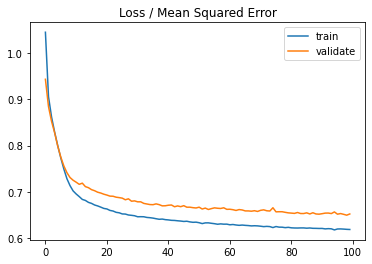

In [182]:
# Initializing the model
truemodel = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
truemodel.add(Dense(8, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
truemodel.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
truemodel.add(Dense(4, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
truemodel.add(Dense(1, activation='linear'))
# Initializing the Optimizer
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
truemodel.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = truemodel.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=100)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 1.1251 - mae: 0.7852 - accuracy: 0.0000e+00 - val_loss: 1.0216 - val_mae: 0.8090 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 730us/step - loss: 1.0022 - mae: 0.8040 - accuracy: 0.0000e+00 - val_loss: 1.0009 - val_mae: 0.8043 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 710us/step - loss: 0.9894 - mae: 0.7913 - accuracy: 0.0000e+00 - val_loss: 0.9886 - val_mae: 0.7797 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 723us/step - loss: 0.9731 - mae: 0.7703 - accuracy: 0.0000e+00 - val_loss: 0.9678 - val_mae: 0.7482 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 707us/step - loss: 0.9488 - mae: 0.7432 - accuracy: 0.0000e+00 - val_loss: 0.9372 - val_mae: 0.7213 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 712us/step - loss: 0.9258

197/197 [==============================] - 0s 814us/step - loss: 0.6748 - mae: 0.5717 - accuracy: 0.0000e+00 - val_loss: 0.6739 - val_mae: 0.5662 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 763us/step - loss: 0.6716 - mae: 0.5668 - accuracy: 0.0000e+00 - val_loss: 0.6723 - val_mae: 0.5854 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 789us/step - loss: 0.6690 - mae: 0.5683 - accuracy: 0.0000e+00 - val_loss: 0.6697 - val_mae: 0.5481 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 733us/step - loss: 0.6662 - mae: 0.5631 - accuracy: 0.0000e+00 - val_loss: 0.6675 - val_mae: 0.5516 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 712us/step - loss: 0.6637 - mae: 0.5613 - accuracy: 0.0000e+00 - val_loss: 0.6656 - val_mae: 0.5456 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 697us/step - loss: 0.6617 - m

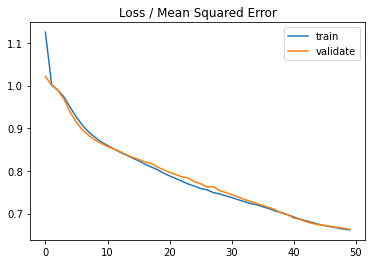

In [183]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(8, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(4, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
# Initializing the Optimizer
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Epoch 1/50
197/197 [==============================] - 1s 1ms/step - loss: 1.8104 - mae: 1.1536 - accuracy: 0.0000e+00 - val_loss: 1.1232 - val_mae: 0.8441 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 0s 672us/step - loss: 0.9864 - mae: 0.7609 - accuracy: 0.0000e+00 - val_loss: 0.9397 - val_mae: 0.7354 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 0s 672us/step - loss: 0.8886 - mae: 0.7078 - accuracy: 0.0000e+00 - val_loss: 0.8778 - val_mae: 0.6946 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 0s 692us/step - loss: 0.8456 - mae: 0.6862 - accuracy: 0.0000e+00 - val_loss: 0.8432 - val_mae: 0.6742 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 0s 682us/step - loss: 0.8169 - mae: 0.6746 - accuracy: 0.0000e+00 - val_loss: 0.8130 - val_mae: 0.6701 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 0s 667us/step - loss: 0.7949

197/197 [==============================] - 0s 661us/step - loss: 0.6810 - mae: 0.5882 - accuracy: 0.0000e+00 - val_loss: 0.6826 - val_mae: 0.5824 - val_accuracy: 0.0000e+00
Epoch 46/50
197/197 [==============================] - 0s 661us/step - loss: 0.6802 - mae: 0.5854 - accuracy: 0.0000e+00 - val_loss: 0.6824 - val_mae: 0.5959 - val_accuracy: 0.0000e+00
Epoch 47/50
197/197 [==============================] - 0s 661us/step - loss: 0.6797 - mae: 0.5874 - accuracy: 0.0000e+00 - val_loss: 0.6814 - val_mae: 0.5758 - val_accuracy: 0.0000e+00
Epoch 48/50
197/197 [==============================] - 0s 677us/step - loss: 0.6786 - mae: 0.5840 - accuracy: 0.0000e+00 - val_loss: 0.6808 - val_mae: 0.5791 - val_accuracy: 0.0000e+00
Epoch 49/50
197/197 [==============================] - 0s 697us/step - loss: 0.6774 - mae: 0.5827 - accuracy: 0.0000e+00 - val_loss: 0.6785 - val_mae: 0.5762 - val_accuracy: 0.0000e+00
Epoch 50/50
197/197 [==============================] - 0s 717us/step - loss: 0.6762 - m

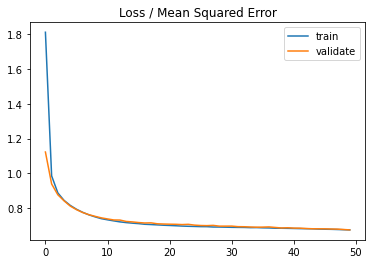

In [184]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(8, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))
# Initializing the Optimizer
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

In [185]:
model = truemodel
Y_result_scaled_5= model.predict(X_val)
Y_result_5 = sc.inverse_transform(Y_result_scaled_5)
print(Y_result_5)

[[0.11274811]
 [0.12367897]
 [0.0155647 ]
 ...
 [0.04125322]
 [0.07478937]
 [0.12427   ]]


In [186]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
def model_performance_regression(predictors,target,pred):
  r2 = r2_score(target, pred)  # to compute R-squared
  adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
  rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
  mae = mean_absolute_error(target, pred)  # to compute MAE

  df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

  return df_perf

In [187]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_5)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.324777,0.202023,0.35235,0.349699


In [188]:
# Predicting on test dat
test_pred = model.predict(X_test)
##As we have scaled the target variable, now after predicting we should inverse the scale and should convert to normal form
test_pred = sc.inverse_transform(test_pred)
print(test_pred)

[[ 3.86017486e-02]
 [ 6.69524595e-02]
 [ 7.58028701e-02]
 [ 5.49444482e-02]
 [ 6.46529123e-02]
 [ 1.81169167e-01]
 [ 1.53106069e-02]
 [ 1.79275051e-01]
 [ 1.03403991e-02]
 [ 7.84499168e-01]
 [ 3.99976894e-02]
 [ 1.26155829e-02]
 [-8.00032262e-03]
 [ 5.33035159e-01]
 [ 2.99949702e-02]
 [ 2.33177897e-02]
 [ 4.86483812e-01]
 [ 1.54343650e-01]
 [ 1.31393120e-01]
 [ 1.13546118e-01]
 [ 1.12130365e-03]
 [ 7.88650215e-02]
 [-8.74099974e-03]
 [ 3.71122733e-02]
 [ 4.61835742e-01]
 [ 8.66237208e-02]
 [ 6.46521509e-01]
 [ 4.76708710e-01]
 [-2.52574328e-02]
 [ 4.69958857e-02]
 [ 9.18407217e-02]
 [ 2.44204938e-01]
 [ 1.33702666e-01]
 [ 7.88002491e-01]
 [ 8.15976560e-02]
 [ 7.38911107e-02]
 [-1.47034610e-02]
 [ 1.00113815e-02]
 [ 9.78408530e-02]
 [ 5.64419404e-02]
 [ 1.32791072e-01]
 [ 4.95431647e-02]
 [ 1.15404641e-02]
 [ 4.22130302e-02]
 [ 1.72746405e-01]
 [ 6.44794181e-02]
 [ 1.82172179e-01]
 [ 3.28692272e-02]
 [ 3.81001264e-01]
 [ 1.61716845e-02]
 [ 1.42822325e-01]
 [ 1.72011778e-01]
 [ 1.0429985

In [189]:
# Checking model performance on train set
print("Training Performance\n")
model_train_perf = model_performance_regression(X_test,y_test, test_pred)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.342668,0.22011,0.282109,0.274116


In [190]:
# Predicting on test dat
train_pred = model.predict(X_train)
##As we have scaled the target variable, now after predicting we should inverse the scale and should convert to normal form
test_pred = sc.inverse_transform(train_pred)
print(train_pred)

[[-0.4626391 ]
 [-0.3880467 ]
 [ 0.27917153]
 ...
 [-0.38229167]
 [ 0.06467639]
 [ 0.5495817 ]]


In [191]:
Y_result_scaled_5= model.predict(X_train)
Y_result_5 = sc.inverse_transform(Y_result_scaled_5)
print(Y_result_5)

[[0.01681747]
 [0.04681308]
 [0.31511953]
 ...
 [0.04912735]
 [0.22886527]
 [0.4238588 ]]


In [192]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_train,y_train, Y_result_5)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.887749,0.79295,0.211902,0.210523


This is about the best this model can do in my opinion. No higher adjusted r-squared scores could be achieved. I have built eleven models, and this one performed the best on the testing data.